<a href="https://colab.research.google.com/github/kasalehi/retention_model_new/blob/main/retension_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# lets bring modules
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer


In [2]:
# lets call the data
from google.colab import files
uploaded=files.upload()


Saving data.csv to data.csv


# Lets manuplate the data
 ## There are some step to clean the data as follow:
  * using make column transformer to clean the data
  * using make column tranformer to normalize data in order to make the    predcition more accurate

In [3]:
df=pd.read_csv('data.csv')

In [4]:
# lets see the dataframe columns
df.columns

Index(['Unnamed: 0', 'LMID', 'MembershipCategory', 'MembershipOrigin',
       'MembershipStatusReason', 'MembershipSubCategory', 'MembershipTerm',
       'MembershipType', 'PaymentFrequency', 'RegularPayment', 'Gender', 'Age',
       'TotalAttendance', 'Churned'],
      dtype='object')

In [10]:
df.head(5)

,Unnamed: 0,LMID,MembershipCategory,MembershipOrigin,MembershipStatusReason,MembershipSubCategory,MembershipTerm,MembershipType,PaymentFrequency,RegularPayment,Gender,Age,TotalAttendance,Churned
0,0,15005345,Contract,New,Inactive,Corporate,12 Months,Multi,Monthly,25.81,Female,35.0,70,1
1,1,20125638,Contract,New,Inactive,Standard,12 Month,Multi,Monthly,22.47,Male,38.0,124,1
2,2,20352929,Contract,New,Active,Corporate,12 Month,Multi,Fortnightly,27.75,Female,56.0,233,0
3,3,30021964,Contract,New,Inactive,Standard,12 Months,Single,Monthly,25.44,Male,47.0,114,1
4,4,30070175,Contract,New,Active,Corporate,12 Months,Multi,Fortnightly,28.81,Male,38.0,520,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34159 entries, 0 to 34158
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              34159 non-null  int64  
 1   LMID                    34159 non-null  object 
 2   MembershipCategory      34159 non-null  object 
 3   MembershipOrigin        34159 non-null  object 
 4   MembershipStatusReason  34159 non-null  object 
 5   MembershipSubCategory   34159 non-null  object 
 6   MembershipTerm          34159 non-null  object 
 7   MembershipType          34159 non-null  object 
 8   PaymentFrequency        34159 non-null  object 
 9   RegularPayment          34159 non-null  float64
 10  Gender                  34155 non-null  object 
 11  Age                     34126 non-null  float64
 12  TotalAttendance         34159 non-null  int64  
 13  Churned                 34159 non-null  int64  
dtypes: float64(2), int64(3), object(9)
mem

In [14]:
# lets remove the unnecessary columns
df.drop(columns=['LMID', 'MembershipCategory', 'MembershipOrigin', 'MembershipStatusReason'], inplace=True)

KeyError: "['LMID', 'MembershipCategory', 'MembershipOrigin', 'MembershipStatusReason'] not found in axis"

In [15]:
df.head(5)

,Unnamed: 0,MembershipSubCategory,MembershipTerm,MembershipType,PaymentFrequency,RegularPayment,Gender,Age,TotalAttendance,Churned
0,0,Corporate,12 Months,Multi,Monthly,25.81,Female,35.0,70,1
1,1,Standard,12 Month,Multi,Monthly,22.47,Male,38.0,124,1
2,2,Corporate,12 Month,Multi,Fortnightly,27.75,Female,56.0,233,0
3,3,Standard,12 Months,Single,Monthly,25.44,Male,47.0,114,1
4,4,Corporate,12 Months,Multi,Fortnightly,28.81,Male,38.0,520,0


In [16]:
# lets find categorical and numerical columns
cat_cols=[]
num_cols=[]
for col in df.columns:
  if df[col].dtype=='object':
    cat_cols.append(col)
  else:
    num_cols.append(col)


In [17]:
cat_cols, num_cols

(['MembershipSubCategory',
  'MembershipTerm',
  'MembershipType',
  'PaymentFrequency',
  'Gender'],
 ['Unnamed: 0', 'RegularPayment', 'Age', 'TotalAttendance', 'Churned'])

In [18]:
# lets investigate the null data
df.isna().sum()

,0
Unnamed: 0,0
MembershipSubCategory,0
MembershipTerm,0
MembershipType,0
PaymentFrequency,0
RegularPayment,0
Gender,4
Age,33
TotalAttendance,0
Churned,0


In [19]:
# lets fix those null values
df['Age']=df['Age'].fillna(df['Age'].mean())

In [22]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode())

In [23]:
df.isna().sum()

,0
Unnamed: 0,0
MembershipSubCategory,0
MembershipTerm,0
MembershipType,0
PaymentFrequency,0
RegularPayment,0
Gender,4
Age,0
TotalAttendance,0
Churned,0


In [24]:
df.dropna(inplace=True)

In [25]:
df.isna().sum()

,0
Unnamed: 0,0
MembershipSubCategory,0
MembershipTerm,0
MembershipType,0
PaymentFrequency,0
RegularPayment,0
Gender,0
Age,0
TotalAttendance,0
Churned,0


In [33]:
df.columns

Index(['Unnamed: 0', 'MembershipSubCategory', 'MembershipTerm',
       'MembershipType', 'PaymentFrequency', 'RegularPayment', 'Gender', 'Age',
       'TotalAttendance', 'Churned'],
      dtype='object')

In [38]:
# lets create the train and test data
x=df[['MembershipSubCategory','MembershipTerm',
'MembershipType', 'PaymentFrequency', 'RegularPayment', 'Gender', 'Age',
'TotalAttendance']]
y=df['Churned']

In [41]:
x.shape, y.shape

((34155, 8), (34155,))

In [42]:
# lets create the train and test
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.2, shuffle=True, random_state=42)

In [43]:
x_train.shape, x_test.shape, y_test.shape, y_train.shape

((27324, 8), (6831, 8), (6831,), (27324,))

In [44]:
cat_cols, num_cols

(['MembershipSubCategory',
  'MembershipTerm',
  'MembershipType',
  'PaymentFrequency',
  'Gender'],
 ['Unnamed: 0', 'RegularPayment', 'Age', 'TotalAttendance', 'Churned'])

In [49]:
# let do the normalizations  on data
ct=make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['MembershipSubCategory',
  'MembershipTerm',
  'MembershipType',
  'PaymentFrequency',
  'Gender']),
    (MinMaxScaler(),['RegularPayment', 'Age', 'TotalAttendance'] )

)

ct.fit(x_train)

x_train_normalize=ct.transform(x_train)
x_test_normalize=ct.transform(x_test)








In [50]:
x_train_normalize.shape, x_test_normalize.shape

((27324, 21), (6831, 21))

In [51]:
from gc import callbacks
# lets create the deep learning logistic regression model
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# lets define the function to see the best rate for our model
learning_rate=tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4*10**(epochs/20))

history= model.fit(

      x_train_normalize,y_train,
      validation_data=(x_test_normalize, y_test),
      epochs=100,
      callbacks=[learning_rate]

)













Epoch 1/100
854/854 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5056 - loss: 0.6987 - val_accuracy: 0.5247 - val_loss: 0.6925 - learning_rate: 1.0000e-04
Epoch 2/100
854/854 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5337 - loss: 0.6916 - val_accuracy: 0.5845 - val_loss: 0.6875 - learning_rate: 1.1220e-04
Epoch 3/100
854/854 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5818 - loss: 0.6866 - val_accuracy: 0.6090 - val_loss: 0.6808 - learning_rate: 1.2589e-04
Epoch 4/100
854/854 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6068 - loss: 0.6791 - val_accuracy: 0.6670 - val_loss: 0.6691 - learning_rate: 1.4125e-04
Epoch 5/100
854/854 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6496 - loss: 0.6670 - val_accuracy: 0.6772 - val_loss: 0.6546 - learning_rate: 1.5849e-04
Epoch 6/100
854/854 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6683 - loss: 0.6529 - val_accuracy: 0.6817 - val_loss: 0.6381 - learning_rate: 1.7783e-04
Epoch 7/100
854/854 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc

<Axes: >

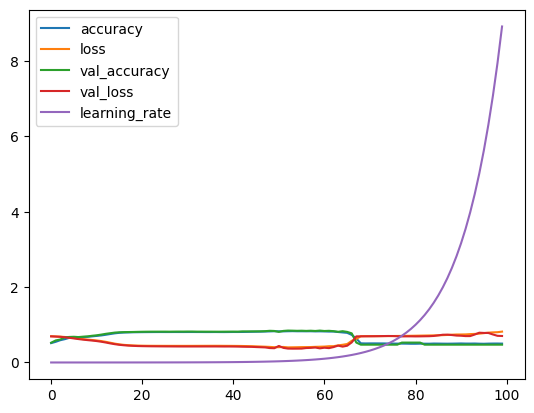

In [52]:
# let draw the loss and accuracy function
pd.DataFrame(history.history).plot()

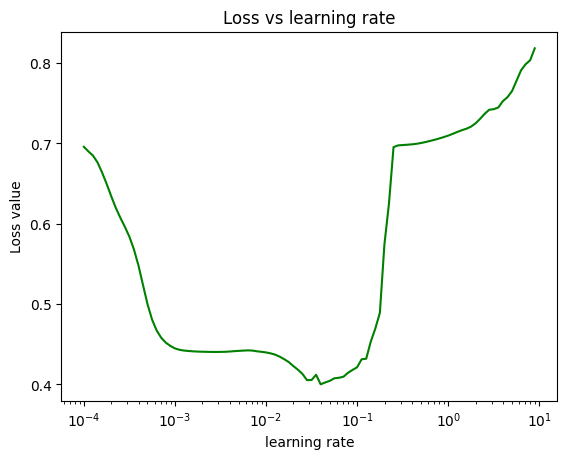

In [54]:
lr=1e-4*10**(tf.range(100)/20)
plt.semilogx(lr, history.history['loss'], c='g')
plt.title('Loss vs learning rate')
plt.xlabel('learning rate')
plt.ylabel('Loss value')
plt.show()